# Лабораторная работа №7
## Задача Коши
### Выполнила Леонова Анна, группа 427 ИБТС, май 2017 года

Требуется найти решение дифференциального уравнения с относительной точностью 0,001
$$ y'''=4y+sin(x)e^{-x} $$
 с относительной точностью 0,001 с начальными условиями
$$ y(0)=1,y'(0)=0, y''(0)=0 $$
на отрезке от 0 до 2 методом Тейлора. Сравнить результат с точным решением и решением, полученным с помощью чётырёхкратного метода Рунге-Кутты.

In [1]:

from math import *
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

## Точное решение

Точное решение находим методом библиотеки Sympy. Сохраняем также значения констант и выражение в правой части для решения другими способами. Находим  первую производную для построения графика в фазовой плоскости.

In [2]:
x = Symbol("x")
y = Symbol("y")
f = Function("f")
 
#init_printing()
expression = 4*y+sin(x)*exp(-x)
ex1 = expression.subs(y,f(x))
#expression = 4*f(x)+sin(x)*exp(-x)
eq = Eq(f(x).diff(x, 3), ex1)
solu=dsolve(eq, f(x))
print("Solution for ", eq, " : ", solu)
 
eq1=solu.rhs.subs(x,0)-1
print("1: ",eq1)
eq2=solu.rhs.diff(x).subs(x,0)
print("2: ",eq2)
eq3=solu.rhs.diff(x,x).subs(x,0)
print("3: ",eq3)

C1,C2,C3 = symbols("C1 C2 C3")
solconst=solve([eq1,eq2,eq3],C1,C2,C3)
print(solconst)
#print(solconst[C1])


result=solu.rhs.subs([(C1,solconst[C1]),(C2,solconst[C2]),(C3,solconst[C3])])
print("result: ",result)
firder=diff(result,x)
print("1st derivative: ", firder)
r_e = lambdify((x,y),expression,"numpy")
f=lambdify(x,result,"numpy")
g=lambdify(x,firder,"numpy")

Solution for  Eq(Derivative(f(x), x, x, x), 4*f(x) + exp(-x)*sin(x))  :  Eq(f(x), C3*exp(2**(2/3)*x) + (C1*sin(2**(2/3)*sqrt(3)*x/2) + C2*cos(2**(2/3)*sqrt(3)*x/2))/sqrt(exp(2**(2/3)*x)) - exp(-x)*sin(x)/4 - exp(-x)*cos(x)/4)
1:  C2 + C3 - 5/4
2:  2**(2/3)*sqrt(3)*C1/2 - 2**(2/3)*C2/2 + 2**(2/3)*C3
3:  -2**(1/3)*sqrt(3)*C1 - 2**(1/3)*C2 + 2*2**(1/3)*C3 + 1/2
{C1: 2**(2/3)*sqrt(3)/24, C2: 2**(2/3)/24 + 5/6, C3: -2**(2/3)/24 + 5/12}
result:  (2**(2/3)*sqrt(3)*sin(2**(2/3)*sqrt(3)*x/2)/24 + (2**(2/3)/24 + 5/6)*cos(2**(2/3)*sqrt(3)*x/2))/sqrt(exp(2**(2/3)*x)) + (-2**(2/3)/24 + 5/12)*exp(2**(2/3)*x) - exp(-x)*sin(x)/4 - exp(-x)*cos(x)/4
1st derivative:  -2**(2/3)*(2**(2/3)*sqrt(3)*sin(2**(2/3)*sqrt(3)*x/2)/24 + (2**(2/3)/24 + 5/6)*cos(2**(2/3)*sqrt(3)*x/2))/(2*sqrt(exp(2**(2/3)*x))) + (-2**(2/3)*sqrt(3)*(2**(2/3)/24 + 5/6)*sin(2**(2/3)*sqrt(3)*x/2)/2 + 2**(1/3)*cos(2**(2/3)*sqrt(3)*x/2)/8)/sqrt(exp(2**(2/3)*x)) + 2**(2/3)*(-2**(2/3)/24 + 5/12)*exp(2**(2/3)*x) + exp(-x)*sin(x)/2


Решение:


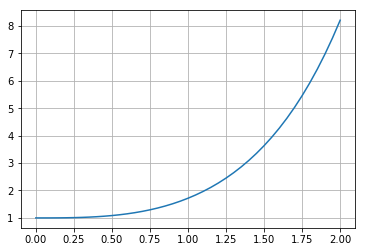

Первая производная:


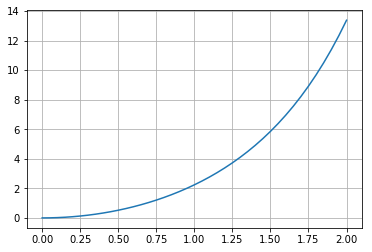

Фазовая плоскость:


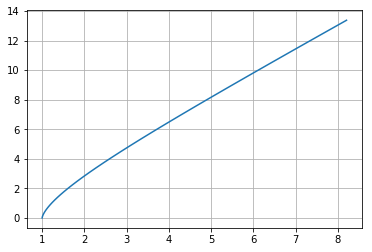

In [3]:
sh=0.05
x=np.arange(0,2+sh,sh)
print("Решение:")
plt.plot(x,f(x))
plt.grid()
plt.show()
print("Первая производная:")
plt.plot(x,g(x))
plt.grid()
plt.show()
print("Фазовая плоскость:")
plt.plot(f(x),g(x))
plt.grid()
plt.show()

Решение уравнения 3 порядка - вектор с компонентами (y,y',y''), зависящий от х. Его первая производная по х приравнивается к функции - правой части, тоже вектору с 3 компонентами, зависящими от х, y, y', y''. В данном случае уравнение преобразовывается в систему следующим образом:
$$ y_1'=y_2 $$
$$ y_2'=y_3 $$
$$ y_3'=4y_1+sin(x)e^{-x} $$
Для возможности точного решения сохраним в функции - правой части системы sympy-выражения, соответствующие правым частям уравнений.

In [4]:

def F(x,y):
    d=Symbol("d")
    s=Symbol("s")
    expr1=d
    expr2=s
    expr3=expression
    f=np.zeros((3,1))
    f[0][0]=y[1][0]
    f[1][0]=y[2][0]
    #f[2][0]=4*y[0][0]+sin(x)*exp(-x)
    f[2][0]=r_e(x,y[0][0])
    return f,expr1,expr2,expr3



## Метод Рунге-Кутты 
Пусть Y - вектор (y,y',y''), зависящий от х, и задана функция правой части f(x,Y), возвращающая вектор. Тогда значение Y в каждой точке сетки x_n с выбранным постоянным шагом h можно вычислить по следующим формулам:
$$ Y_{n+1} = Y_n + (k_1 + 2k_2 + 2k_3 + k_4)h/6 $$
$$ k_1 = f(x_n,Y_n) $$
$$ k_2 = f(x_n + h/2, Y_n + hk_1/2) $$
$$ k_3 = f(x_n + h/2, Y_n + hk_2/2) $$
$$ k_4 = f(x_n + h, Y_n + hk_3) $$

Функция:


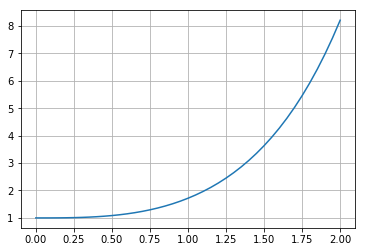

Разница точного решения и решения методом Рунге-Кутты:


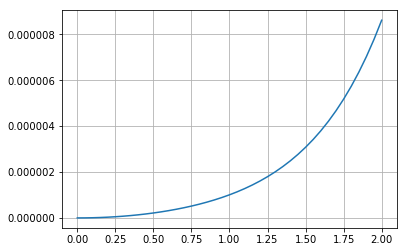

In [5]:
h=sh

y_0=np.zeros((3,1))
y_0[0][0]=1

x=np.arange(0,2+h,h)
n=x.shape[0]
y_mat=np.zeros((3,n))
y_mat[0][0]=y_0[0][0]
y_mat[1][0]=y_0[1][0]
y_mat[2][0]=y_0[2][0]
for i in range(1,n):
    y_prev=np.zeros((3,1))
    y_prev[0][0]=y_mat[0][i-1]
    y_prev[1][0]=y_mat[1][i-1]
    y_prev[2][0]=y_mat[2][i-1]
    y_curr=np.zeros((3,1))
    k1=F((i-1)*h,y_prev)[0]
    k2=F(h*(i-0.5),y_prev+0.5*h*k1)[0]
    k3=F(h*(i-0.5),y_prev+0.5*h*k2)[0]
    k4=F(h*(i),y_prev+h*k3)[0]
    y_curr=y_prev+(k1+2*k2+2*k3+k4)*h/6
    y_mat[0][i]=y_curr[0][0]
    y_mat[1][i]=y_curr[1][0]
    y_mat[2][i]=y_curr[2][0]
y_rk=np.zeros((n))
for i in range(n):
    y_rk[i]=y_mat[0][i]
print("Функция:")
plt.plot(x,y_rk)
plt.grid()
plt.show()
print("Разница точного решения и решения методом Рунге-Кутты:")
plt.plot(x,f(x)-y_rk)
plt.grid()
plt.show()


## Метод Тейлора
Для этого метода тоже выберем сетку x_n с шагом h. Тогда значение функции в следующей точке можно вычислять по формуле:
$$ Y_{n+1} = Y_n + h\phi(x_n,Y_n,h) $$
$$ \phi(x,Y,h) = Y' + hY''/2 $$
В последнее равенство подставляем f(x,Y(x)) вместо Y' и берём производную от f по x:
$$ Y'' = f_x'(x,Y)+f_y'(x,Y)f(x,Y) $$
f_x' есть производная векторной функции по скалярному аргументу и имеет размерность Y, f_y' есть производная векторной функции по векторному аргументу, т.е. это матрица Якоби перехода от компонент f к компонентам Y

In [6]:
def Fx(f,x0,y0):
    e1=f[1]
    e2=f[2]
    e3=f[3]
    x=Symbol("x")
    fr=np.zeros((3,1))
    e10=diff(e1,x)
    e20=diff(e2,x)
    e30=diff(e3,x)
    fr[0][0]=lambdify((x,y),e10,"numpy")(x0,y0)
    fr[1][0]=lambdify((x,y),e20,"numpy")(x0,y0)
    fr[2][0]=lambdify((x,y),e30,"numpy")(x0,y0)
    return fr,e10,e20,e30

def Fy(f,x0,y0):
    e1=f[1]
    e2=f[2]
    e3=f[3]
    x=Symbol("x")
    y=Symbol("y")
    d=Symbol("d")
    s=Symbol("s")
    mr=np.zeros((3,3))
    m00=diff(e1,y)
    m01=diff(e1,d)
    m02=diff(e1,s)
    m10=diff(e2,y)
    m11=diff(e2,d)
    m12=diff(e2,s)
    m20=diff(e3,y)
    m21=diff(e3,d)
    m22=diff(e3,s)
    mr[0][0]=lambdify((x,y),m00,"numpy")(x0,y0)
    mr[0][1]=lambdify((x,y),m01,"numpy")(x0,y0)
    mr[0][2]=lambdify((x,y),m02,"numpy")(x0,y0)
    mr[1][0]=lambdify((x,y),m10,"numpy")(x0,y0)
    mr[1][1]=lambdify((x,y),m11,"numpy")(x0,y0)
    mr[1][2]=lambdify((x,y),m12,"numpy")(x0,y0)
    mr[2][0]=lambdify((x,y),m20,"numpy")(x0,y0)
    mr[2][1]=lambdify((x,y),m21,"numpy")(x0,y0)
    mr[2][2]=lambdify((x,y),m22,"numpy")(x0,y0)
    return mr,m00,m01,m02,m10,m11,m12,m20,m21,m22

def M(mat,v):
    #Это только для матрицы 3х3 и столбца 3х1
    r=np.zeros((3,1))
    r[0][0]=mat[0][0]*v[0][0]+mat[0][1]*v[1][0]+mat[0][2]*v[2][0]
    r[1][0]=mat[1][0]*v[0][0]+mat[1][1]*v[1][0]+mat[1][2]*v[2][0]
    r[2][0]=mat[2][0]*v[0][0]+mat[2][1]*v[1][0]+mat[2][2]*v[2][0]
    return r


Шаг сетки, начальное значение:  0.05
Функция:


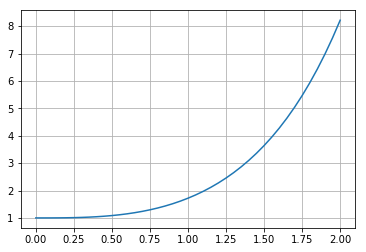

Разность точного решения и решения методом Тейлора:


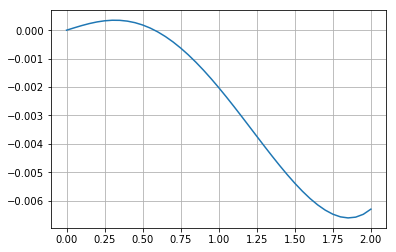

In [8]:
h=sh
print("Шаг сетки, начальное значение: ", h)
x=np.arange(0,2+h,h)
def phi(x,y,h):
    return F(x,y)[0] + (Fx(F(x,y),x,y)[0]+M(Fy(F(x,y),x,y)[0],F(x,y)[0]))*h/2
l=x.shape[0]
fun0=np.zeros((l))
fun1=np.zeros((l))
fun2=np.zeros((l))
#print(y_0)
fun0[0]=y_0[0]
fun1[0]=y_0[1]
fun2[0]=y_0[2]
y_prev=np.zeros((3,1))
y_curr=np.zeros((3,1))
y_curr=y_0
#print(fun0[0])
for i in range(1,l):
    y_prev=y_curr
    y_curr = y_prev + h*phi(x[i],y_prev,h)
    fun0[i]=y_curr[0]
    fun1[i]=y_curr[1]
    fun2[i]=y_curr[2]
    #print(fun0[i])
print("Функция:")
plt.plot(x,fun0)
plt.grid()
plt.show()
print("Разность точного решения и решения методом Тейлора:")
plt.plot(x,(f(x)-fun0))
plt.grid()
plt.show()

Проверим, есть ли на сетке точки с относительной погрешностью, превышающей заданную точность.

19


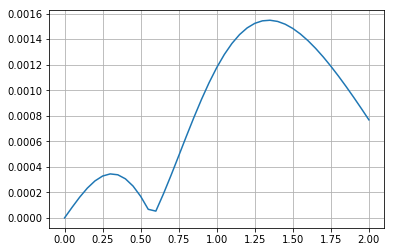

In [9]:
eps=0.001
counter=0
delt=np.zeros((l))
for i in range(1,l):
    delt[i]=abs(f(x[i])-fun0[i])/abs(f(x[i]))
    if(delt[i]>eps):
        counter += 1
print(counter)
plt.plot(x,delt)
plt.grid()
plt.show()
ite=1

Да, такие точки есть. Для повышения точности уменьшим шаг сетки вдвое и повторим вычисления, продолжаем итерационный процесс, пока не уложимся в заданную точность.

Количество итераций:  3
Функция:


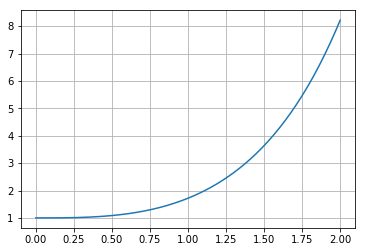

Разность точного решения и решения методом Тейлора:


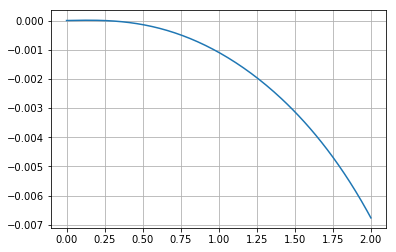

Относительная точность в зависимости от х:


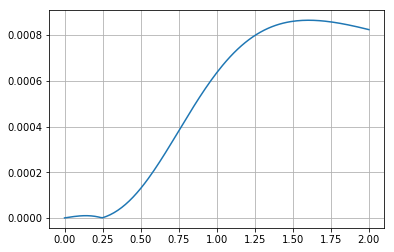

In [11]:
while(ite<10 and counter>0):
    h=h/2
    #print("Шаг сетки, начальное значение: ", h)
    x=np.arange(0,2+h,h)
    def phi(x,y,h):
        return F(x,y)[0] + (Fx(F(x,y),x,y)[0]+M(Fy(F(x,y),x,y)[0],F(x,y)[0]))*h/2
    l=x.shape[0]
    fun0=np.zeros((l))
    fun1=np.zeros((l))
    fun2=np.zeros((l))
    #print(y_0)
    fun0[0]=y_0[0]
    fun1[0]=y_0[1]
    fun2[0]=y_0[2]
    y_prev=np.zeros((3,1))
    y_curr=np.zeros((3,1))
    y_curr=y_0
    #print(fun0[0])
    for i in range(1,l):
        y_prev=y_curr
        y_curr = y_prev + h*phi(x[i],y_prev,h)
        fun0[i]=y_curr[0]
        fun1[i]=y_curr[1]
        fun2[i]=y_curr[2]
        #print(fun0[i])
    plt.plot(x,fun0)
    plt.grid()
    #plt.show()

    plt.plot(x,(f(x)-fun0))
    plt.grid()
    #plt.show()
    
    counter=0
    delt=np.zeros((l))
    for i in range(1,l):
        delt[i]=abs(f(x[i])-fun0[i])/abs(f(x[i]))
        if(delt[i]>eps):
            counter += 1
    #print(counter)
    plt.plot(x,delt)
    plt.grid()
    #plt.show()
    ite+=1
print("Количество итераций: ", ite)
print("Функция:")
plt.plot(x,fun0)
plt.grid()
plt.show()
print("Разность точного решения и решения методом Тейлора:")
plt.plot(x,(f(x)-fun0))
plt.grid()
plt.show()
print("Относительная точность в зависимости от х:")
plt.plot(x,delt)
plt.grid()
plt.show()

Фазовая плоскость:


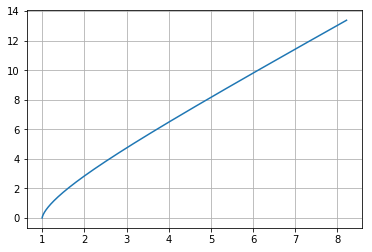

In [12]:
print("Фазовая плоскость:")
plt.plot(fun0,fun1)
plt.grid()
plt.show()

Полученное решение с заданной точностью совпадает с точным. Разница между решениями, полученными тремя разными способами, оказалась мала. Графики на фазовой плоскости также совпали.

Шаг сетки, начальное значение:  0.05


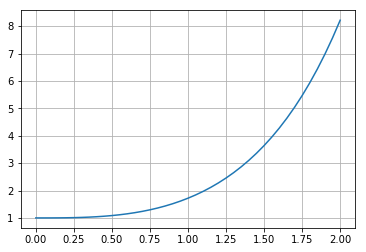

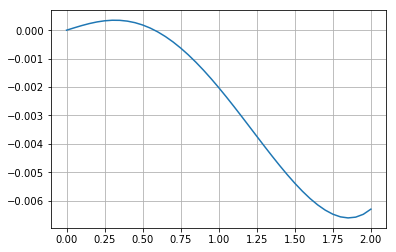

In [114]:
h=sh
print("Шаг сетки, начальное значение: ", h)
x=np.arange(0,2+h,h)
def phi(x,y,h):
    return F(x,y)[0] + (Fx(F(x,y),x,y)[0]+M(Fy(F(x,y),x,y)[0],F(x,y)[0]))*h/2
l=x.shape[0]
fun0=np.zeros((l))
fun1=np.zeros((l))
fun2=np.zeros((l))
#print(y_0)
fun0[0]=y_0[0]
fun1[0]=y_0[1]
fun2[0]=y_0[2]
y_prev=np.zeros((3,1))
y_curr=np.zeros((3,1))
y_curr=y_0
#print(fun0[0])
for i in range(1,l):
    y_prev=y_curr
    y_curr = y_prev + h*phi(x[i],y_prev,h)
    fun0[i]=y_curr[0]
    fun1[i]=y_curr[1]
    fun2[i]=y_curr[2]
    #print(fun0[i])
plt.plot(x,fun0)
plt.grid()
plt.show()

plt.plot(x,(f(x)-fun0))
plt.grid()
plt.show()

In [93]:
x,y,z=symbols("x y z")
fu=Function("fu")
ea=x+y*z*x
e4=diff(ea,y)
print(e4)
fu=lambdify((x,y,z),ea,"numpy")(5,4,1)
print(fu)



x*z
25
